2-D-NN Binary Classificaiton

Epoch 0, Loss: 0.4990553712559761
Epoch 1000, Loss: 0.4981510716170451
Epoch 2000, Loss: 0.4981510716170451
Epoch 3000, Loss: 0.4981510716170451
Epoch 4000, Loss: 0.4981510716170451
Epoch 5000, Loss: 0.4981510716170451
Epoch 6000, Loss: 0.4981510716170451
Epoch 7000, Loss: 0.4981510716170451
Epoch 8000, Loss: 0.4981510716170451
Epoch 9000, Loss: 0.4981510716170451
Epoch 10000, Loss: 0.4981510716170451
Epoch 11000, Loss: 0.4981510716170451
Epoch 12000, Loss: 0.4981510716170451
Epoch 13000, Loss: 0.4981510716170451
Epoch 14000, Loss: 0.4981510716170451
Epoch 15000, Loss: 0.4981510716170451
Epoch 16000, Loss: 0.4981510716170451
Epoch 17000, Loss: 0.4981510716170451
Epoch 18000, Loss: 0.4981510716170451
Epoch 19000, Loss: 0.4981510716170451
Epoch 20000, Loss: 0.4981510716170451
Epoch 21000, Loss: 0.4981510716170451
Epoch 22000, Loss: 0.4981510716170451
Epoch 23000, Loss: 0.4981510716170451
Epoch 24000, Loss: 0.4981510716170451
Epoch 25000, Loss: 0.4981510716170451
Epoch 26000, Loss: 0.4981

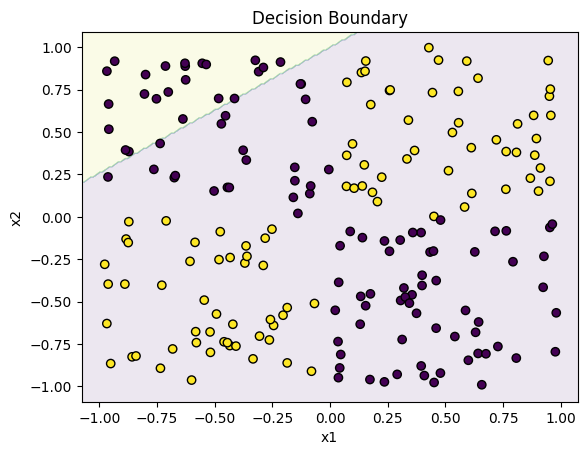

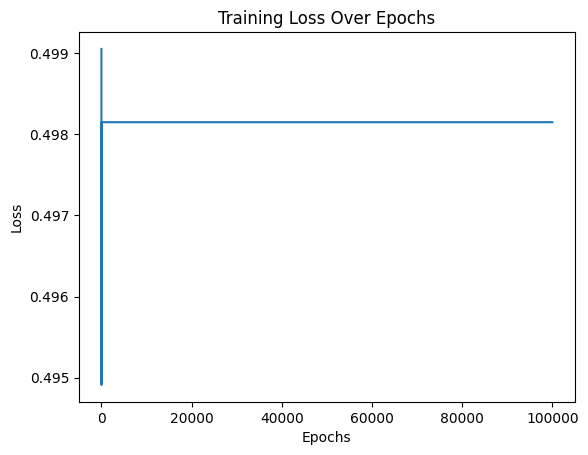

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Generate synthetic 2D dataset
np.random.seed(0)
num_samples = 200
X = np.random.rand(num_samples, 2) * 2 - 1  # Generate points in the range [-1, 1]
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)  # Label: 1 if x1 * x2 > 0 else 0

# Network parameters
input_size = 2
output_size = 1
epochs = 100000
learning_rate = 0.1

# Initialize weights and biases
weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

# Training the perceptron
losses = []

for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights) + bias
    output = sigmoid(weighted_sum)

    # Compute loss
    loss = y - output

    # Backward pass
    adjustments = loss * sigmoid_derivative(output)
    weights += learning_rate * np.dot(X.T, adjustments)
    bias += learning_rate * np.sum(adjustments)

    # Record loss for monitoring
    losses.append(np.mean(np.abs(loss)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(loss))}")

# Function to classify a point
def classify_point(point):
    weighted_sum = np.dot(point, weights) + bias
    output = sigmoid(weighted_sum)
    return 1 if output > 0.5 else 0

# Example test points
test_points = np.array([
    [0.5, 0.5],  # Likely class 1
    [-0.5, -0.5],  # Likely class 1
    [0.5, -0.5],  # Likely class 0
    [-0.5, 0.5]   # Likely class 0
])

# Classify the test points
for i, point in enumerate(test_points):
    result = classify_point(point)
    print(f"Point {point} classified as: {result}")

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([classify_point(point) for point in grid]).reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()

# Plotting the loss over epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


Epoch 0, Loss: 0.5000306497628375
Epoch 1000, Loss: 0.4981510716170451
Epoch 2000, Loss: 0.4981510716170451
Epoch 3000, Loss: 0.4981510716170451
Epoch 4000, Loss: 0.4981510716170451
Epoch 5000, Loss: 0.4981510716170451
Epoch 6000, Loss: 0.4981510716170451
Epoch 7000, Loss: 0.4981510716170451
Epoch 8000, Loss: 0.4981510716170451
Epoch 9000, Loss: 0.4981510716170451
Point [0.5 0.5] classified as: 0
Point [-0.5 -0.5] classified as: 0
Point [ 0.5 -0.5] classified as: 0
Point [-0.5  0.5] classified as: 0


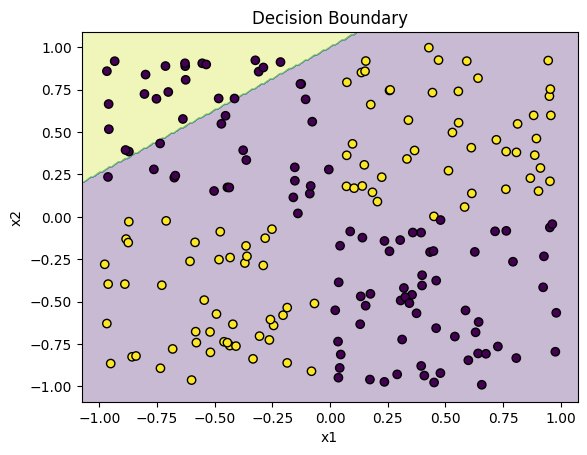

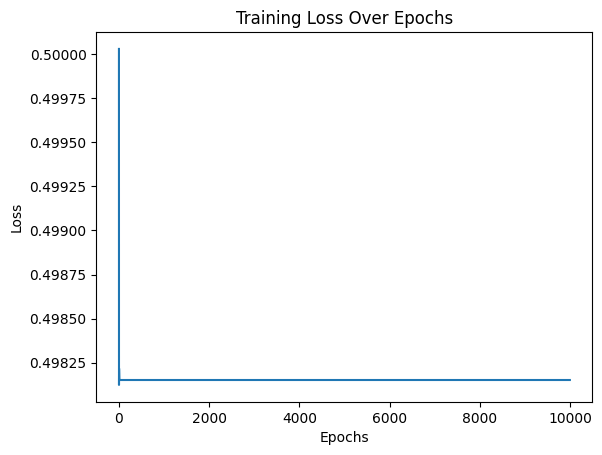

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Generate synthetic 2D dataset
np.random.seed(0)
num_samples = 200
X = np.random.rand(num_samples, 2) * 2 - 1  # Generate points in the range [-1, 1]
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)  # Label: 1 if x1 * x2 > 0 else 0

# Network parameters
input_size = 2
output_size = 1
epochs = 10000
learning_rate = 0.1

# Initialize weights and biases
weights = np.random.randn(input_size, output_size) * 0.01  # Smaller random values
bias = np.zeros((1, output_size))

# Training the perceptron
losses = []

for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights) + bias
    output = sigmoid(weighted_sum)

    # Compute loss
    loss = y - output

    # Backward pass
    adjustments = loss * sigmoid_derivative(output)
    weights += learning_rate * np.dot(X.T, adjustments)
    bias += learning_rate * np.sum(adjustments, axis=0, keepdims=True)

    # Record loss for monitoring
    losses.append(np.mean(np.abs(loss)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(loss))}")

# Function to classify a point
def classify_point(point):
    weighted_sum = np.dot(point, weights) + bias
    output = sigmoid(weighted_sum)
    return 1 if output > 0.5 else 0

# Example test points
test_points = np.array([
    [0.5, 0.5],  # Likely class 1
    [-0.5, -0.5],  # Likely class 1
    [0.5, -0.5],  # Likely class 0
    [-0.5, 0.5]   # Likely class 0
])

# Classify the test points
for i, point in enumerate(test_points):
    result = classify_point(point)
    print(f"Point {point} classified as: {result}")

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([classify_point(point) for point in grid]).reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()

# Plotting the loss over epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()
